### Train-test split

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 500)

random_seed = 2024
np.random.seed(random_seed)

In [74]:
bottle_data_path = '../data/bottle'

In [75]:
bottle_df = pd.read_csv(f'{bottle_data_path}/bottle_01.csv', index_col=0)

In [76]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510592 entries, 0 to 536964
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   R_Depth     510592 non-null  int64  
 1   R_TEMP      507022 non-null  float64
 2   R_SALINITY  510592 non-null  float64
 3   R_SIGMA     507018 non-null  float64
 4   R_SVA       507022 non-null  float64
 5   R_DYNHT     506842 non-null  float64
 6   R_O2        387973 non-null  float64
 7   R_O2Sat     387003 non-null  float64
 8   R_SIO3      217345 non-null  float64
 9   R_PO4       236798 non-null  float64
 10  R_NO3       205931 non-null  float64
 11  R_NO2       205930 non-null  float64
 12  R_NH4       43565 non-null   float64
 13  R_CHLA      145661 non-null  float64
 14  R_PHAEO     145657 non-null  float64
 15  R_PRES      510592 non-null  float64
 16  Lat_Dec     510592 non-null  float64
 17  Lon_Dec     510592 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 74.0 MB


Perform a random train-test split of the data. R_SALINITY is a target feature here.

In [77]:
bottle_df_train, bottle_df_test = train_test_split(bottle_df, test_size=0.2, random_state=random_seed)

print(bottle_df_train.shape, bottle_df_test.shape)

(408473, 18) (102119, 18)


### Exploring the data

Let's explore the data.

In [78]:
def hist_plot(dataset, f_size=(10, 5)):
    plt.figure(figsize=f_size)
    sns.histplot(data=dataset, kde=False, bins=50)
    plt.plot()

def box_plot(dataset, f_size=(10, 5)):
    plt.figure(figsize=f_size)
    sns.boxplot(data=dataset.values)
    plt.plot()

#### R_Depth

Reported Depth (from pressure) in meters

In [79]:
# missing values
bottle_df_train['R_Depth'].isnull().sum()

0

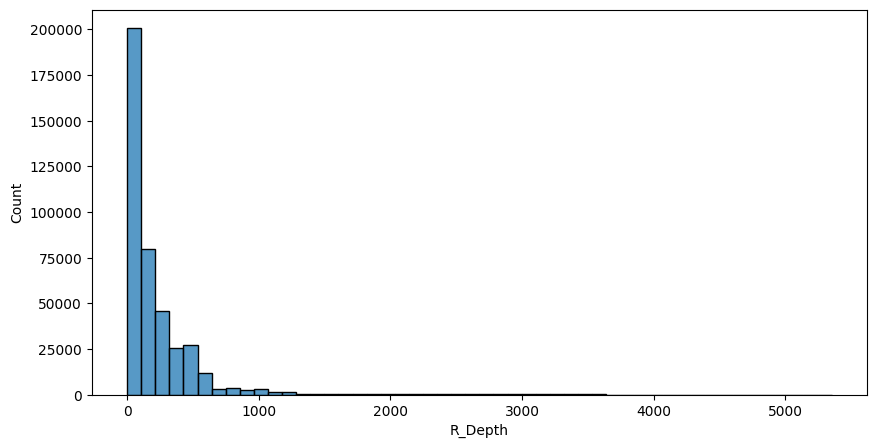

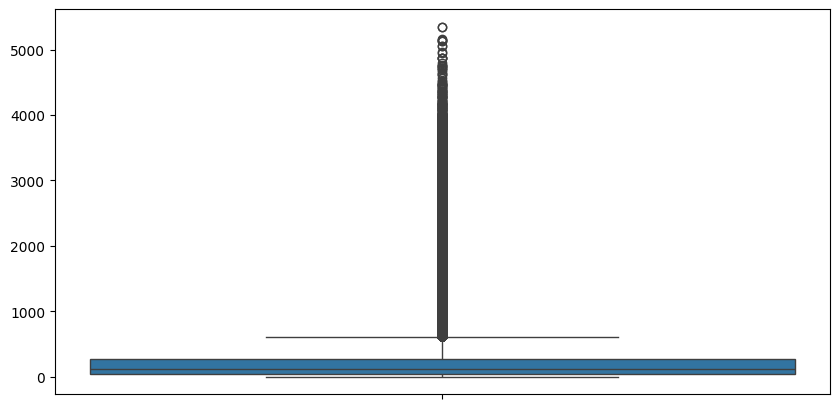

In [80]:
hist_plot(bottle_df_train['R_Depth'])
box_plot(bottle_df_train['R_Depth'])


#### R_TEMP

Reported Temperature

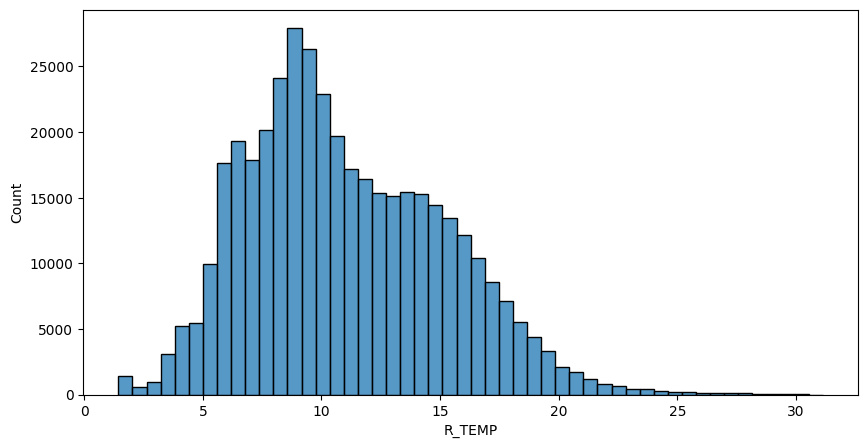

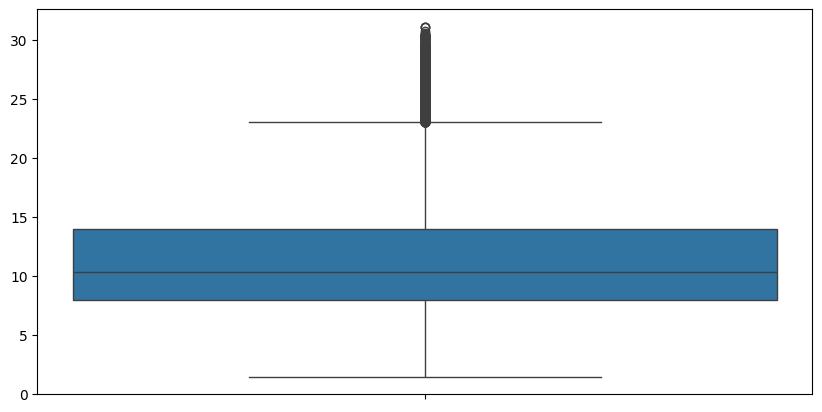

In [81]:
hist_plot(bottle_df_train['R_TEMP'])
box_plot(bottle_df_train['R_TEMP'])

In [82]:
print(bottle_df_train['R_TEMP'].isnull().sum(), bottle_df_test['R_TEMP'].isnull().sum())

2912 658


In [83]:
bottle_df_train['R_TEMP'].describe()

count    405561.000000
mean         11.023257
std           4.142635
min           1.440000
25%           7.970000
50%          10.340000
75%          13.990000
max          31.140000
Name: R_TEMP, dtype: float64

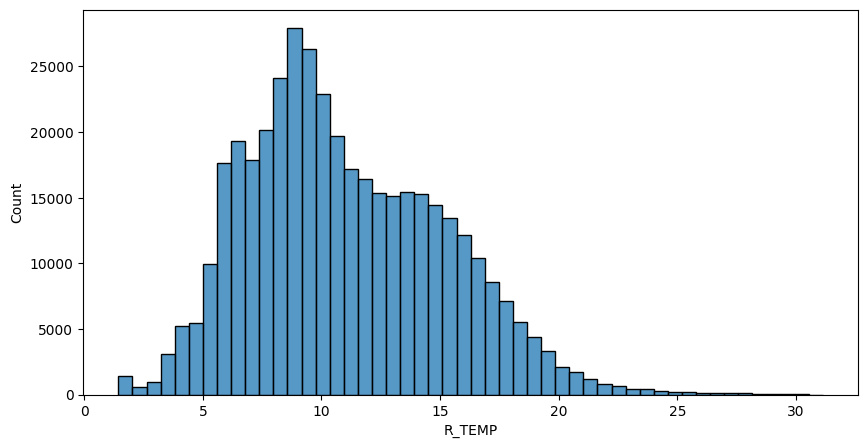

In [84]:
hist_plot(bottle_df_train['R_TEMP'])

#### R_SALINITY - target feature

Reported Salinity

In [85]:
bottle_df_train['R_SALINITY'].describe()

count    408473.000000
mean         33.820325
std           0.459681
min          28.431000
25%          33.477000
50%          33.823000
75%          34.174000
max          37.034000
Name: R_SALINITY, dtype: float64

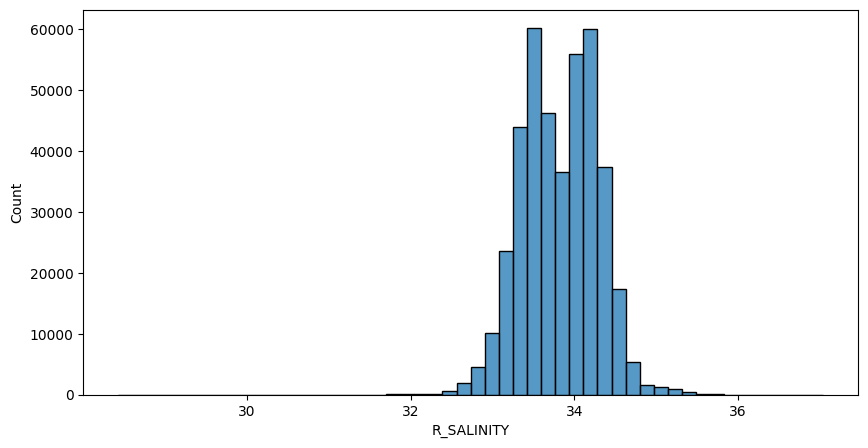

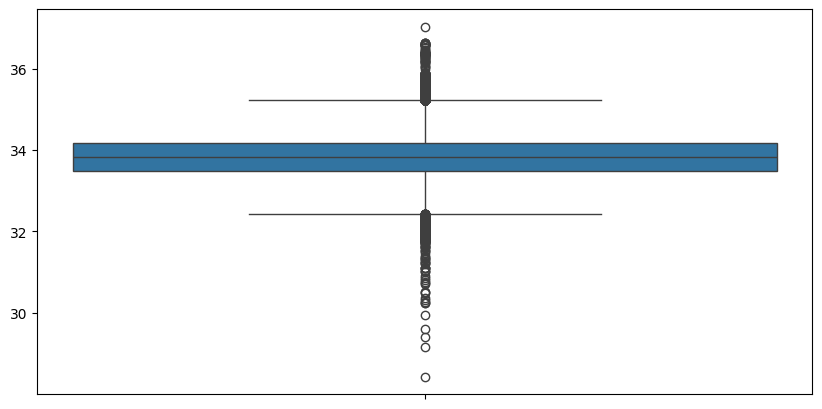

In [86]:
hist_plot(bottle_df_train['R_SALINITY'])
box_plot(bottle_df_train['R_SALINITY'])

## R_SVA

Reported Specific Volume Anomaly

In [87]:
bottle_df_train['R_SVA'].describe()

count    405561.000000
mean        224.581790
std          91.961218
min           7.300000
25%         147.000000
50%         210.600000
75%         301.400000
max         683.400000
Name: R_SVA, dtype: float64

In [88]:
bottle_df_train['R_SVA'].isnull().sum()

2912

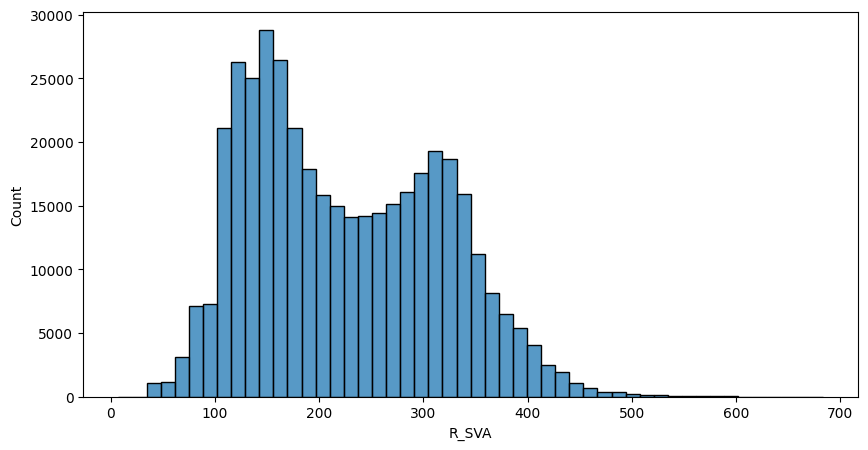

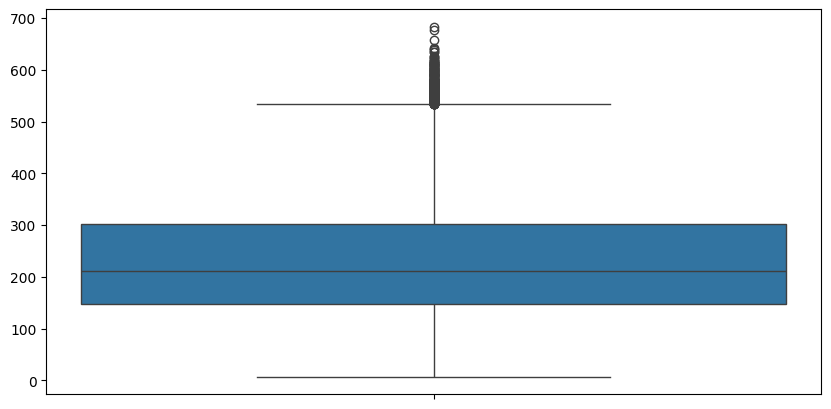

In [89]:
hist_plot(bottle_df_train['R_SVA'])
box_plot(bottle_df_train['R_SVA'])

## R_SIGMA

Reported Potential Density of water

In [90]:
print(bottle_df_train['R_SIGMA'].isnull().sum(), bottle_df_test['R_SIGMA'].isnull().sum())

2915 659


Even though this number might seem high, it is less than 1 percent.

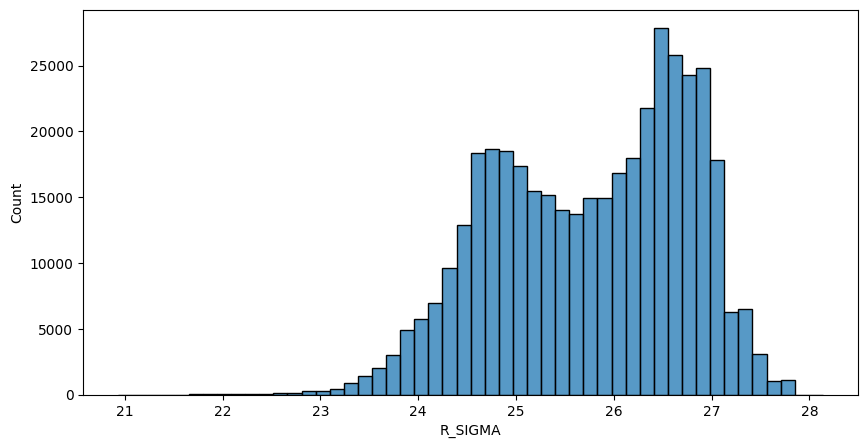

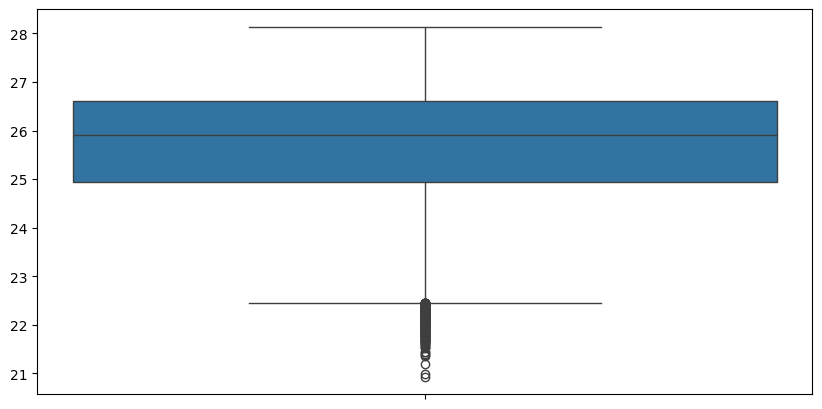

In [91]:
hist_plot(bottle_df_train['R_SIGMA'])
box_plot(bottle_df_train['R_SIGMA'])

## R_DYNHT

Reported Dynamic Height in units of dynamic meters (work per unit mass)

In [92]:
print(bottle_df_train['R_DYNHT'].isnull().sum(), bottle_df_test['R_DYNHT'].isnull().sum())

3033 717


The number of missing values is < 1%

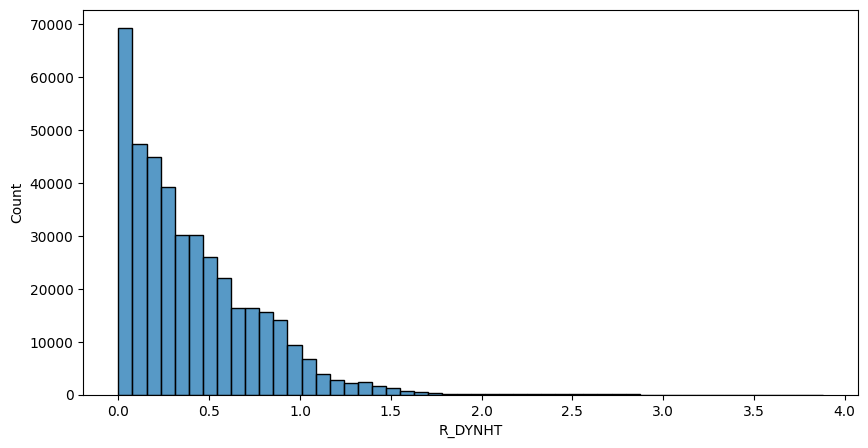

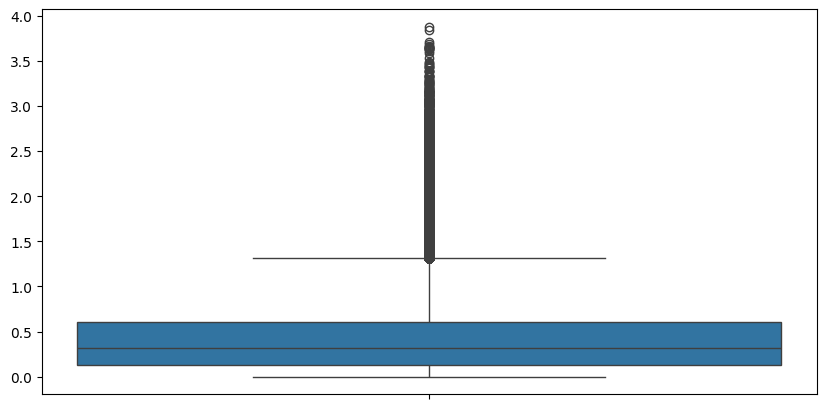

In [93]:
hist_plot(bottle_df_train['R_DYNHT'])
box_plot(bottle_df_train['R_DYNHT'])

## R_O2SAT

Reported Oxygen Saturation

In [94]:
print(bottle_df_train['R_O2Sat'].isnull().sum(), bottle_df_test['R_O2Sat'].isnull().sum())

98911 24678


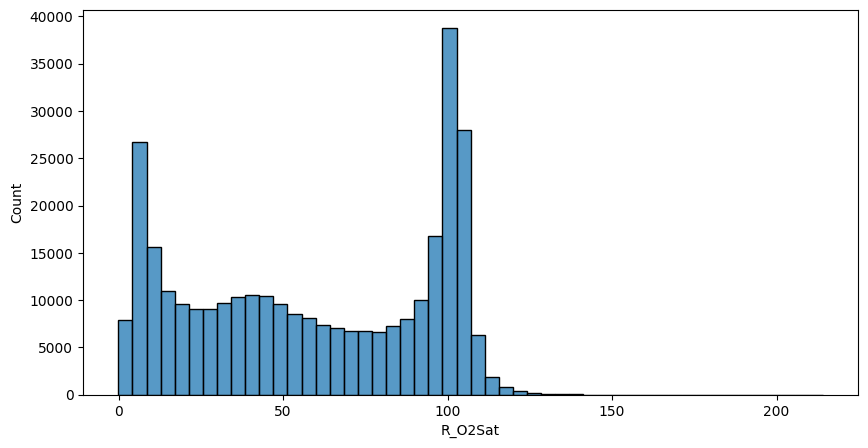

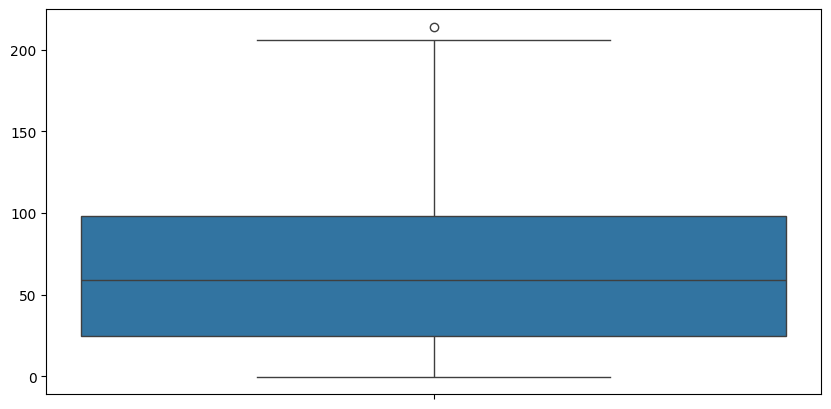

In [95]:
hist_plot(bottle_df_train['R_O2Sat'])
box_plot(bottle_df_train['R_O2Sat'])

## R_NH4


## R_PO4

Reported Phosphate Concentration

In [96]:
print(bottle_df_train['R_PO4'].isnull().sum(), bottle_df_test['R_PO4'].isnull().sum())

219287 54507


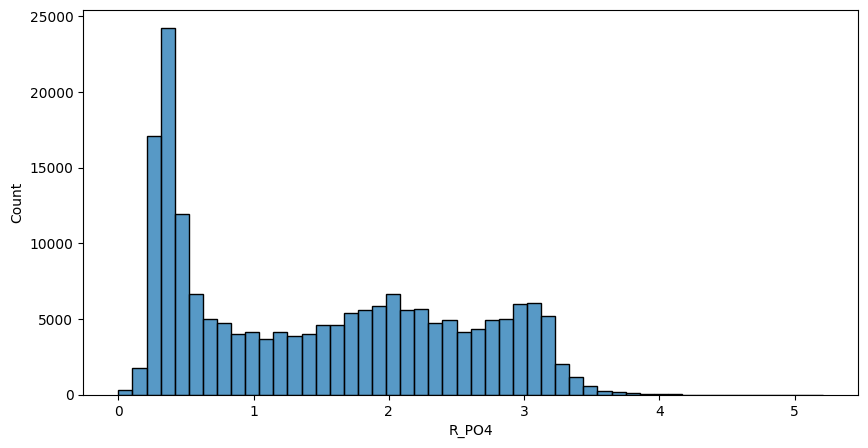

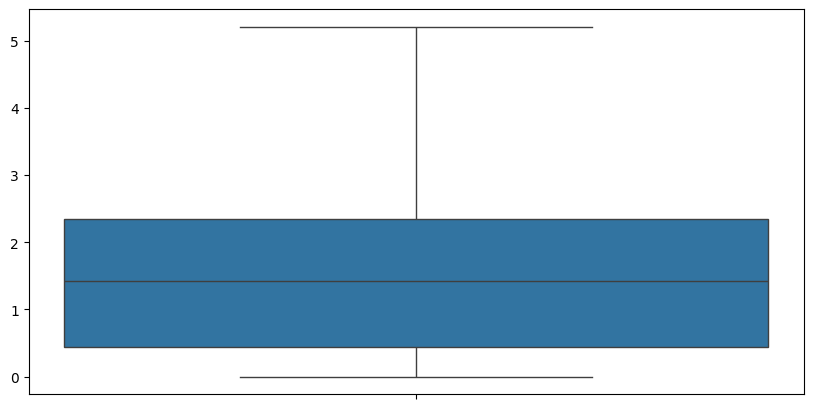

In [97]:
hist_plot(bottle_df_train['R_PO4'])
box_plot(bottle_df_train['R_PO4'])

## R_NO2

Reported Nitrite Concentration

In [98]:
print(bottle_df_train['R_NO2'].isnull().sum(), bottle_df_test['R_NO2'].isnull().sum())

244100 60562


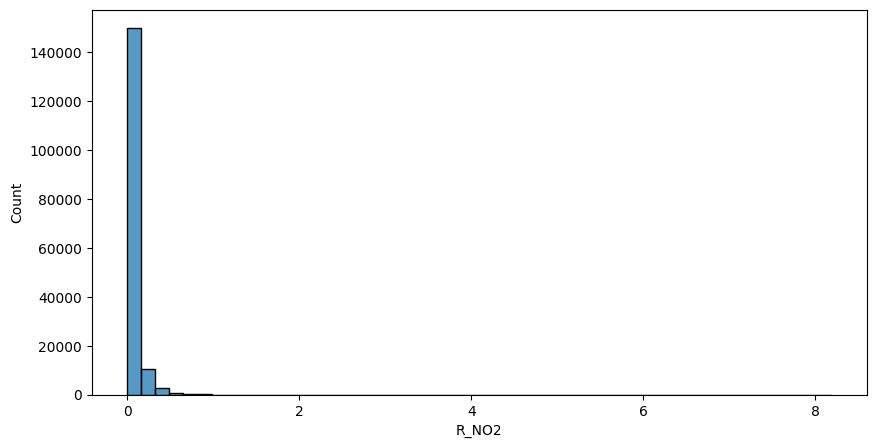

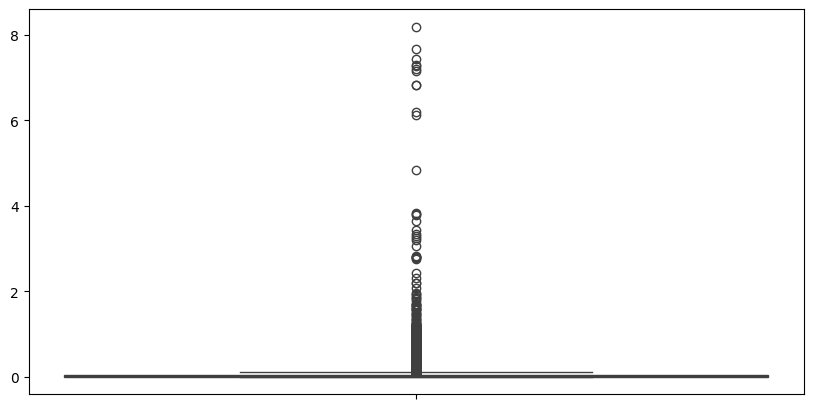

In [99]:
hist_plot(bottle_df_train['R_NO2'])
box_plot(bottle_df_train['R_NO2'])

#### R_O2

Again, here multimodality is even more prominent. Let's impute values from uniform distribution.

In [100]:
bottle_df_train['R_O2'].describe()

count    310346.000000
mean          3.546721
std           2.047933
min          -0.010000
25%           1.620000
50%           3.750000
75%           5.560000
max          11.130000
Name: R_O2, dtype: float64

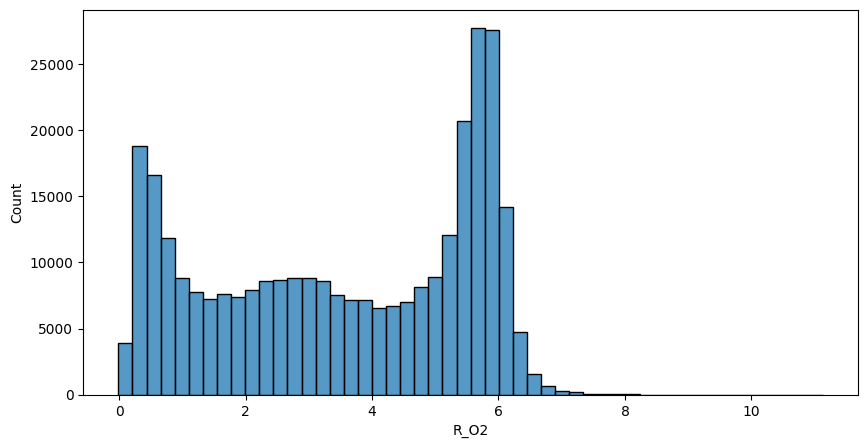

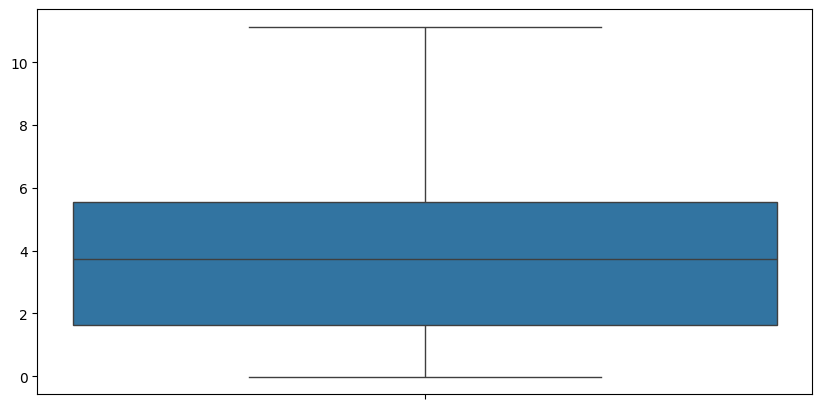

In [101]:
hist_plot(bottle_df_train['R_O2'])
box_plot(bottle_df_train['R_O2'])

In [102]:
print(bottle_df_train['R_O2'].isnull().sum(), bottle_df_test['R_O2'].isnull().sum())

98127 24492


## R_PHAEO

In [103]:
print(bottle_df[bottle_df['R_PHAEO'] < 0].shape)

bottle_df.loc[bottle_df['R_PHAEO'] < 0, 'R_PHAEO'] = np.nan
print(bottle_df[bottle_df['R_PHAEO'] < 0].shape)

(29, 18)
(0, 18)


## Lat_Dec
Latitude

In [104]:
print(bottle_df_train['Lat_Dec'].isnull().sum(), bottle_df_test['Lat_Dec'].isnull().sum())

0 0


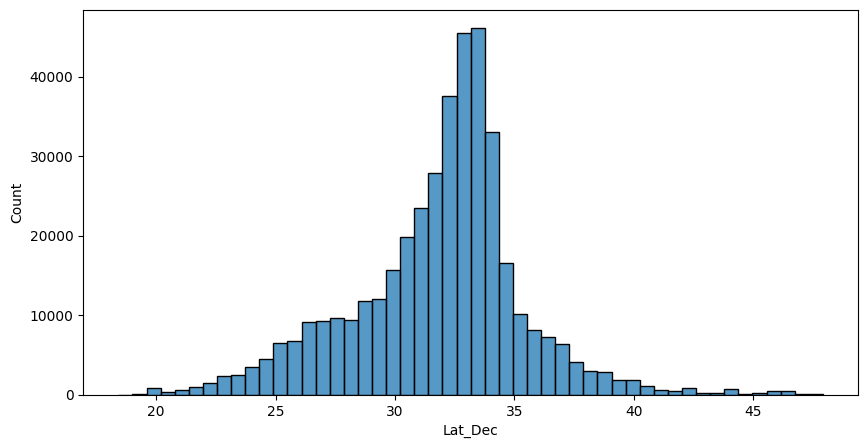

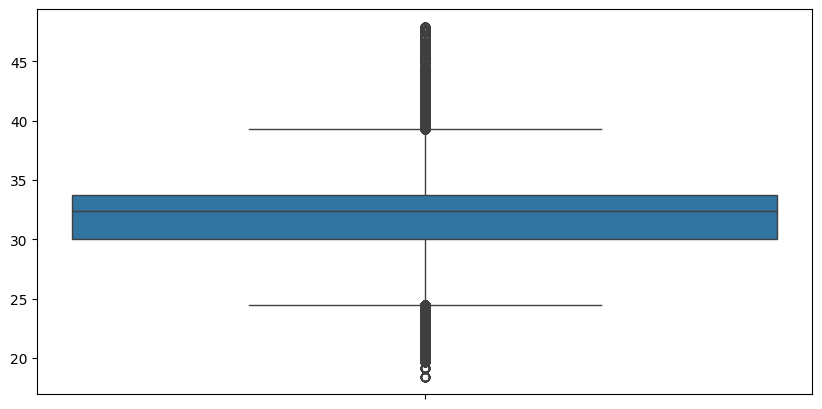

In [105]:
hist_plot(bottle_df_train['Lat_Dec'])
box_plot(bottle_df_train['Lat_Dec'])

## Lon_Dec
Longitude

In [106]:
print(bottle_df_train['Lon_Dec'].isnull().sum(), bottle_df_test['Lon_Dec'].isnull().sum())

0 0


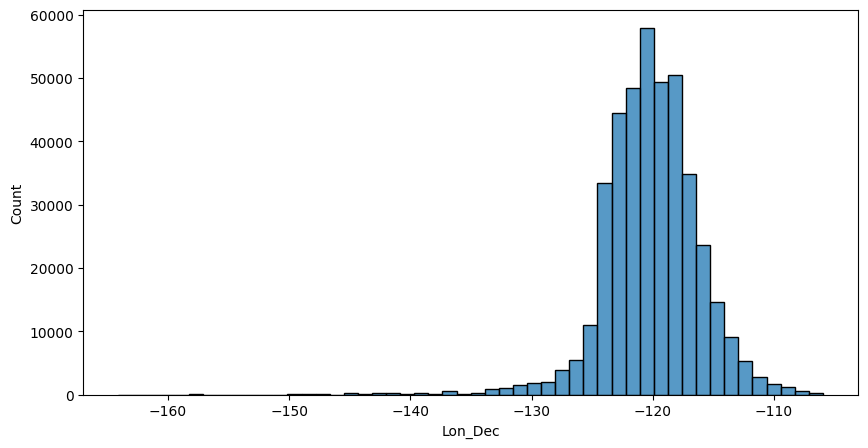

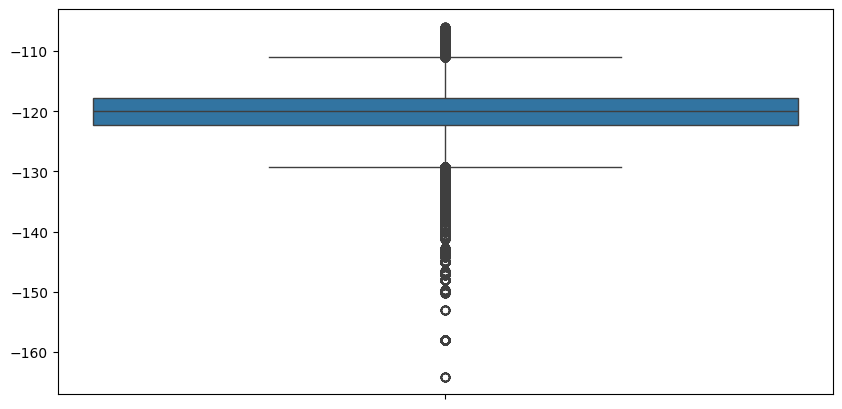

In [107]:
hist_plot(bottle_df_train['Lon_Dec'])
box_plot(bottle_df_train['Lon_Dec'])